## The Data



### Mushroom Hunting: Edible or Poisonous?

Data Source: https://archive.ics.uci.edu/ml/datasets/Mushroom


This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

## Notes Mushroom Random Forest?
- How punny, random mushrooms in a forest
- Write about the dangers of mushrooms etc.
- You can eat all mushrooms, but some only once.
- Party toggle
- Multi input prediction with csv, single input prediction with sliders.
- Provide graphs and insights about the dataset and the most important features.
- Complex and simplified model?
- recall to minimize falls negatives and death!!!!. However F1 Score used for sequential feature selection.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SequentialFeatureSelector
import pickle
import plotly.express as px


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay


In [2]:
data = pd.read_csv('/Users/jamesclayfield/Library/Mobile Documents/com~apple~CloudDocs/IE Documents/Term 2/Machine Learning 2/Boosting Algorithms/mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
print(data.columns)
print()
print(f"There are {len((data.columns))} features in the dataset")

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

There are 23 features in the dataset


## 1.0 EDA, Data Prep and Feature Engineering

#### 1.1 Validating Data Integrity
Before running any machine learning algorithms on this model, we should ensure the integrity of the data and perform any data cleaning or prep if necessary.

The below print statements reveal, that the data is clean and requires no specific cleaning, prep or imputation. As the data is categorical, there are no outliers in the traditional sense that we can identify.

In [4]:
print(f"There are {data.duplicated().sum()} duplicate records")
print(f"There are {data.isna().sum().sum()} null values in the dataset")

There are 0 duplicate records
There are 0 null values in the dataset


#### 1.2 Data Prep
From investigating the data above, we can see there are 23 features, with one being the target variable (class). All features are categorical. As such they will need to be One Hot Encoded in order to be usable in a machine learning algorithm.

When One Hot Encoding, we chose to drop the first category of each feature using `drop='first'`. `handle_unknown='ignore'` is used so the OHE doesn't fail when new and unknown categorical variables are introduced in the test set or production environment that were not previously known when fitting the OHE.

Once the One Hot Encoder has been Fit, we can export it using Pickle for later use in the streamlit application.

In [5]:
X = data.drop(columns='class')     #Setting X by dropping the target variable.
y = data['class']                   #Defining Target Variable "class"

In [6]:
#One Hot Encoding
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')

#One Hot Encoding X
X = ohe.fit_transform(X)
X = pd.DataFrame(X, columns=ohe.get_feature_names_out())
X.head()

#Transforming y to be binary 1 or 0. If poisonous -> 1, not poisonous -> 0.
y = y.apply(lambda x: 1 if x == 'p' else 0)
y = y.rename('poisonous')

print(f"There are {len(X.columns)} features/columns after one hot encoding")

There are 95 features/columns after one hot encoding


In [7]:
#Exporting One Hot Encoder to be usable in streamlit app.
with open ("OHE_Encoder.pkl", "wb") as f:
    pickle.dump(ohe, f)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

#### 1.2 Exploratory Data Analysis (EDA)
After One Hot Encoding the dataset, we are now faced with 95 features/columns. This, as you can see, is far too much to do any traditional form of feature selection using correlation, as the correlation matrix is very difficult to read with so many features.

We can however see, that there are many highly correlated variables from the sorted list of correlations seen below the correlation matrix. This overwhelming number of features necessitates a machine learning model that can handle a large amount of features and is capable of some inate feature selection and feature importance determination.

In [9]:
# Compute the correlation matrix
correlation_matrix = X.corr()


# Plot the correlation matrix
fig = px.imshow(
    correlation_matrix,
    text_auto=True,  # Displays the correlation values in the matrix
    color_continuous_scale="RdBu_r",  # Red-to-blue color scale
    zmin=-1, zmax=1  # Ensures color range is from -1 to 1
)

fig.update_layout(
    title="Correlation Matrix",
    xaxis_title="Features",
    yaxis_title="Features"
)

fig.show()

In [10]:
correlation_pairs = correlation_matrix.unstack()
sorted_pairs = correlation_pairs.sort_values(kind="quicksort", key=abs, ascending=False)

sorted_pairs[sorted_pairs < 1].head(10)

veil-color_w              stalk-color-below-ring_o   -0.979302
stalk-color-above-ring_o  veil-color_w               -0.979302
veil-color_w              stalk-color-above-ring_o   -0.979302
stalk-color-below-ring_o  veil-color_w               -0.979302
ring-number_o             ring-number_t              -0.968959
ring-number_t             ring-number_o              -0.968959
stalk-color-below-ring_o  gill-attachment_f          -0.955097
stalk-color-above-ring_o  gill-attachment_f          -0.955097
gill-attachment_f         stalk-color-above-ring_o   -0.955097
                          stalk-color-below-ring_o   -0.955097
dtype: float64

## 2.0 Model Creation

### 2.1 Model Selection 

Due to the aforementioned highly dimensional nature of the mushrooms dataset, a model is required that can handle this. In light of this, the random forest classifier was chosen as it is capable of handling highly dimensional. Its ability to provide feature importance is also very useful. 

Please see below for further benefits of the Random Forest algorithm, why it was selected, and how it works.

#### 2.1.1 How Random Forest Works
For the Mushroom Edibility Classifier, the Random Forest Classifier was chosen. This is a type of ensemble algorithm. The algorithm works by creating a set of decision trees and combining their predicitions to improve accurancy and reduce overfitting. The random forest algorithm is a bagging technique as it combines multiple models into one to obtain a better prediction.

**1) Building Multiple Decision Trees with Bootstrapping**

Each decision tree in the forest is constructed using a different random subset of the training data. Each one of these subsets is created using **Bootstrapping**.
Bootstrapping is a bagging technique whereby datapoints are randomly sampled to create diverse training subsets for each tree. This ensures that every tree in 
a random forest is trained on a unique part of the data. 

**2) Random Feature Selection at Every Split (Bagging)**

As the Random Forest Algorithm trains each decision tree, it randomly selects a subset of features from the features available for each split in the tree. 
The use of different features further increases the diversity of the trees by reducing correlation between them. As such the ensemble is more robust, preventing 
any single feature from dominating the model.

**3) Trees Grow until Stopping Criterion is Reached**

In the forest, each tree is allowed to grow until a stopping criteria is reached. These include minimum number of samples per node, maximum depth etc.. 
These hyperparameters can be experimented with and the best identified through hyperparameter tuning methods like grid and random search.

**4) Aggregation and Prediction**

Once all trees are trained the Random forest Algorithm conbines them through aggregation. Each tree then "votes" for a class. The forest's final prediction is 
the class that receives the majority vote across all trees.

#### 2.1.2 Benefits of Random Forest
The Random Forest algorithm was selected for the following key reasons:

**Reduced Overfitting**

The aggregation of diverse decision trees, with the output being a majority vote or averaging, reduces individual biases 
and errors, reducing the risk of overfitting. This provides a more generalized, robust and thus accurate model.
risk of overfitting.

**Inate Feature Selection**

The random forest algorithm employs a technique called **"bagging"**. This refers to where at each split in the tree, 
only a certain number of features is considered. This is controlled by the ***max_features*** parameter in Sci-kit learn. As such the model 
inherently reduces the dominance of individual features, enabling a diverse set of trees and feature combinations.

**Feature Importance**
Random forest provide feature importance score after training based on how effectively and 
often each feature is used across all trees.

**Handling of Higly Dimensional Data**
Random forest algorithms are effective at handling datasets with high dimensionality, such as the 96 OHE encoded 
variable dataset in our example. This makes them robust to irrelevant features.

#### 2.1.3 Training Methodology

On a first pass, a model was trained considering all 23 features. The model was trained using RandomizedSearch Cross Validation to identify optimal hyperparameters.

Two Models were trained. One Model was trained considering all 23 features. This model achieve perfect accuracy, precision and f1-score. However one must enter a large amount of variables before receiving a prediction. As such a second model was also trained with the aim of minimizing the amount of variables while still retaining the same amount of accuracy, precision, recall and f1-score.

### 2.1 Training Full Model

The model is initialized with 150 classifiers, however this does not matter as we are also defining a hyperparameter grid. Random_state=8 provides consistency between runs, for better testing, evaluation and reproducibility.

**Hyper Parameter Grid**
1. *N_estimators* - This refers to the number of trees in the forest. `np.arange(100, 500, 50)` defines values from 100 to 450 in increments of 50. More trees are generally good for model performance as they tend to reduce variance and increase accuracy. However, more trees increase computational cost and training time.

2. *max_depth* - The maximum depth of each tree. In this case "None" allows trees to fully expand until all leaves contain a single class or fall below the `min_samples_split` threshold set next. Deeper trees can be beneficial as they are able of capturing more information. However, the deeper the tree, the higher the risk of overfitting.

3. *min_samples_split* - As described above, min_samples_split determines the minimum number of samples required for a tree to split and branch off again. Higher values can be used to prevent overfitting by limiting tree growth and encouraging statistically significant splits. Smaller values on the other hand allow for deeper splits.

4. *min_samples_leaf* - This refers to the minimum number of samples required to be at a leaf node. A leaf node is a terminal node, representing the final decision for a path of splits in a decision tree. Higher values can help smooth a model and reduce complexity. Smaller values capture finer details, however could cause overfitting.

5. *max_features* - This refers to the number of features considered when looking for the best split. Reducing max_features can help reduce correlation between each tree.

6. *bootstrap* - As described above, bootstrapping provides diversity between trees by having different trees use different parts of the dataset.

**Randomized Search Cross Validation**

The randomized Search Cross Validation randomly iterates through the hyperparameter search grid for a prespecified number of times. It then evaluates the models tested with these hyperparameters on 5 folds of the dataset.

On our case we have performed a random search optimizing for recall. This is because the consequences of receiving a false negative and eating a poisonous mushroom thought to be safe could be fatal. A random search was performed to reduce computing time and cost compared to a grid search.


In [ ]:
model = RandomForestClassifier(n_estimators=150, random_state=8)

#hyperparameter tuning (See above for details on each hyperparameter and its impact on the tree.)
param_distributions = {
    'n_estimators': np.arange(100, 500, 50),       
    'max_depth': [None, 10, 20, 30, 50],           
    'min_samples_split': [2, 5, 10, 15],           
    'min_samples_leaf': [1, 2, 4, 8],              
    'max_features': [10, 'sqrt', 'log2'],          
    'bootstrap': [True, False]                     
}

#Randomized Search Cross Validation is performed here (See above for details on the decisions made.)
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=50,              #Number of cross validation searches.
    scoring='recall',       #Test Metric for the randomized search. We have picked recall to reduce the risk of deadly false negatives.
    cv=5,                   #Number of Cross Validation Folds
    random_state=42,        #Random state for consistency and reproducibility.
    n_jobs=-1,              #Allows Computation to be run on all computer cores.
    refit=True              #This saves the best model under .best_estimator_
)

# Fit the model
random_search.fit(X_train, y_train)

# Initialize model and SelectFromModel
best_full_model = random_search.best_estimator_

The below Confusion Matrices reveal the model performance is perfect on the train and the test set.

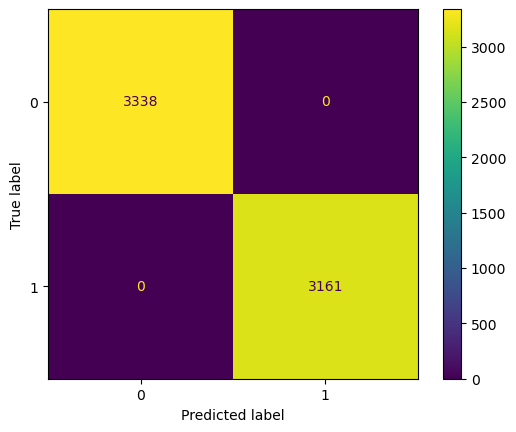

In [25]:
y_predict_train = best_full_model.predict(X_train)
y_predict_train
ConfusionMatrixDisplay.from_predictions(y_train, y_predict_train)

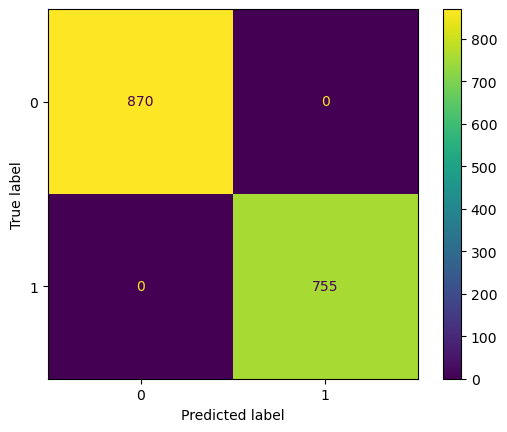

In [13]:
# Predicting the Test set results
y_predict_test = best_full_model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_test)

                     importance
odor_n                 0.119543
gill-size_n            0.100481
odor_f                 0.077880
bruises_t              0.052332
ring-type_p            0.047542
...                         ...
gill-color_e           0.000168
veil-color_y           0.000161
cap-surface_g          0.000140
spore-print-color_o    0.000000
spore-print-color_y    0.000000

[95 rows x 1 columns]


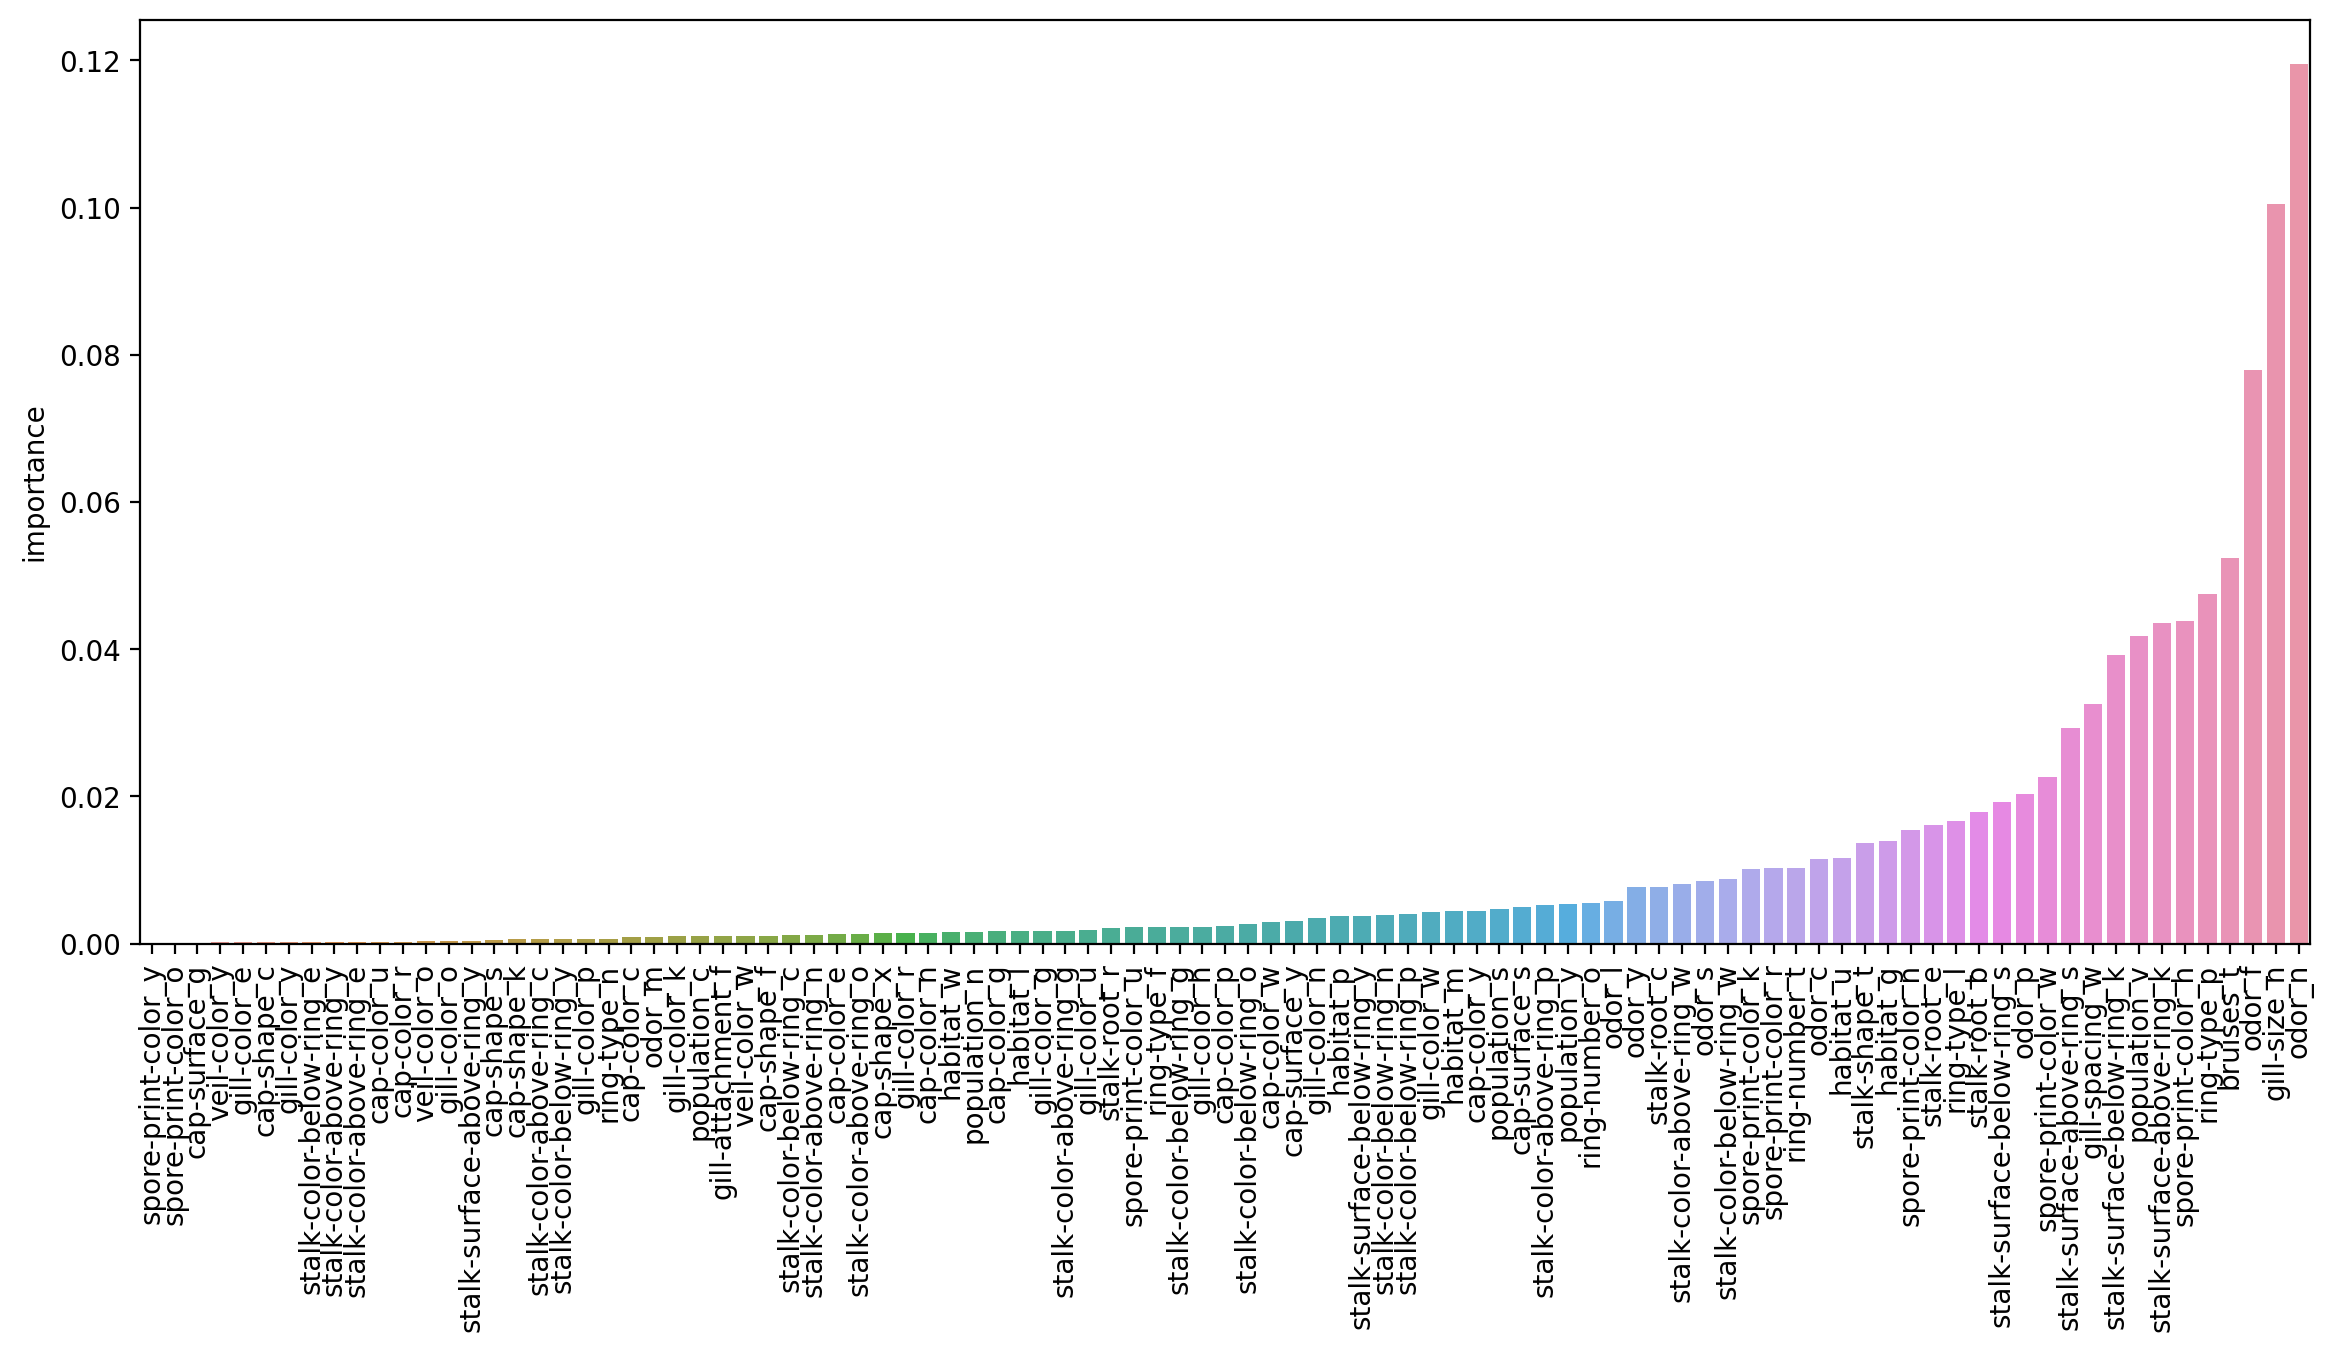

In [32]:

# Get feature importances from the best estimator
feature_importance = pd.DataFrame(
    best_full_model.feature_importances_, 
    index=X_train.columns, 
    columns=['importance']
).sort_values('importance', ascending=False)

print(feature_importance)

feature_importance = feature_importance.sort_values("importance")
plt.figure(figsize=(14, 6), dpi=200)
sns.barplot(data=feature_importance, x=feature_importance.index, y="importance")
plt.xticks(rotation=90)
plt.show()

In [15]:
# Save model
with open ("random_forest_full.pkl", "wb") as f:
    pickle.dump(best_full_model, f)


### 2.2 Training Simplified Model

The feature importance information from the above model reveal, that there are many variables with almost no importance. This means, it is most likely possible to improve model perfomance with a reduced number of input features. We will test this by training a second model with feature selection with the aim of finding a model with the minimum number of features needed to achieve the same performance of the first model.

#### Sequential Feature Selection
A Sequential Feature Selector algorithm was selected to identify the model with the least possible number of variables.
The algorithm adds features to the feature set iteratively in a forward setting and stops when the F1 score no longer changes when adding an additional feature.


While optimizing recall is the goal to avoid deadly misclassifications, the f1 metric was used. This is because otherwise the algorithm would find a single variable minimizing recall and stop the selection, resulting in a model with perfect recall and terrible other performance. The F1 score, which is the harmonized mean of precision and recall, is a more balanced metric which still values recall to minimize the deadly false negatives.

**Outcome and Performance Score**

The feature set was reduced from 96 to 10 while retaining the same model performance. In addition, users using this method only need to enter 8 pieces of information to receive a reliable prediction.

**Feature Analysis**

Odor seems to be the most important mushroom category. An odor of none is the most important feature, while anise and pungent are also important odors in determining mushroom poisonousness. The second most significant feature is whether a mushroom is bruised.

In [ ]:
#hyperparameter tuning
param_distributions = {
    'n_estimators': np.arange(100, 500, 50),       
    'max_depth': [None, 10, 20, 30, 50],           
    'min_samples_split': [2, 5, 10, 15],           
    'min_samples_leaf': [1, 2, 4, 8],              
    'max_features': [10, 'sqrt', 'log2'],          
    'bootstrap': [True, False]                     
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='recall',
    cv=5,
    random_state=42,
    n_jobs=-1,
    refit=True
)

# Fit the model
random_search.fit(X_train, y_train)

# Use the best estimator from the RandomizedSearchCV for feature selection
best_model = random_search.best_estimator_

sfs = SequentialFeatureSelector(
    best_model, n_features_to_select='auto', 
    tol=0.0001,
    direction="forward", 
    scoring="f1",
    n_jobs=-1
)


In [17]:
sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=RandomForestClassifier(bootstrap=False,
                                                           max_depth=30,
                                                           min_samples_split=10,
                                                           n_estimators=200,
                                                           random_state=8),
                          n_features_to_select='auto', n_jobs=-1, scoring='f1',
                          tol=0.0001)

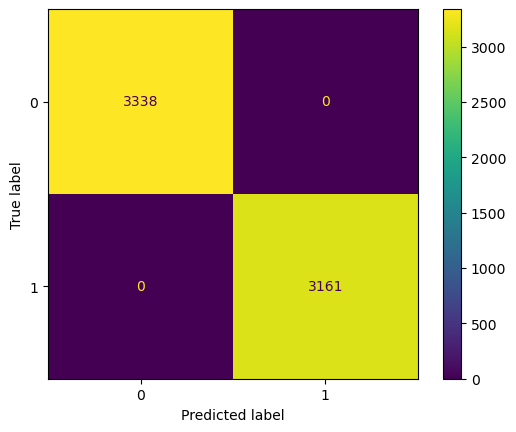

In [18]:
selected_features_mask = sfs.get_support()

# Transform the training and test data using only the selected features
X_train_selected = X_train.loc[:, selected_features_mask]
X_test_selected = X_test.loc[:, selected_features_mask]

# Fit the best model on the selected features
best_model.fit(X_train_selected, y_train)

y_predict_train = best_model.predict(X_train_selected)
y_predict_train
ConfusionMatrixDisplay.from_predictions(y_train, y_predict_train)

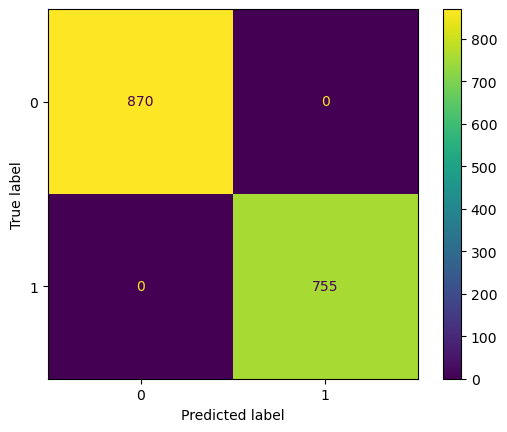

In [19]:
y_predict_test = best_model.predict(X_test_selected)
y_predict_test
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_test)

In [20]:
X_test_selected.columns

Index(['cap-color_y', 'bruises_t', 'odor_l', 'odor_n', 'odor_p', 'gill-size_n',
       'stalk-root_c', 'stalk-surface-below-ring_y', 'spore-print-color_r',
       'spore-print-color_u'],
      dtype='object')

In [21]:
# Save model
with open ("random_forest_short.pkl", "wb") as f:
    pickle.dump(best_model, f)


In [22]:
results = pd.DataFrame(random_search.cv_results_)
results = results.sort_values("mean_test_score", ascending=False)
results[results['rank_test_score'] == 1].T

,49,43,22,20,19,29,32,16,24,11,40,9,8,45,46,5,2,27
mean_fit_time,0.241874,0.25936,0.210696,0.778238,0.817369,0.441698,0.360941,0.753005,0.292263,0.462147,0.429434,0.685288,0.215656,0.283447,0.6156,0.431673,0.431442,0.219516
std_fit_time,0.01979,0.008914,0.013375,0.025275,0.025283,0.03441,0.006542,0.008438,0.017501,0.021194,0.008767,0.012462,0.011674,0.018631,0.027401,0.015551,0.012159,0.006155
mean_score_time,0.013162,0.012836,0.010991,0.037167,0.048012,0.024955,0.022796,0.031713,0.016092,0.024301,0.028689,0.034209,0.011062,0.016384,0.029602,0.02211,0.022182,0.012467
std_score_time,0.000441,0.0002,0.003236,0.005746,0.007468,0.003681,0.006695,0.004736,0.00331,0.004663,0.003854,0.004959,0.002863,0.005773,0.006906,0.003574,0.002614,0.005238
param_n_estimators,150,150,100,400,450,250,200,350,150,250,250,350,100,150,300,200,200,100
param_min_samples_split,10,10,10,5,15,10,15,15,2,10,2,15,5,15,15,10,10,15
param_min_samples_leaf,1,2,2,1,2,2,1,1,1,1,2,2,1,1,1,1,1,1
param_max_features,log2,log2,sqrt,10,log2,log2,log2,10,sqrt,sqrt,log2,10,10,log2,sqrt,sqrt,sqrt,10
param_max_depth,20,10,None,None,30,10,20,30,20,20,None,30,20,10,20,None,30,10
param_bootstrap,True,False,False,True,False,False,False,False,True,True,True,True,False,False,False,False,False,False


#### Feature Importance

In [23]:

# Get feature importances from the best estimator
feature_importance = pd.DataFrame(
    best_model.feature_importances_, 
    index=X_train_selected.columns, 
    columns=['importance']
).sort_values('importance', ascending=False)

print(feature_importance)

                            importance
odor_n                        0.546543
bruises_t                     0.112291
gill-size_n                   0.105815
stalk-root_c                  0.069100
stalk-surface-below-ring_y    0.043570
odor_l                        0.033790
cap-color_y                   0.032862
spore-print-color_r           0.031579
odor_p                        0.019592
spore-print-color_u           0.004857


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'spore-print-color_u'),
  Text(1, 0, 'odor_p'),
  Text(2, 0, 'spore-print-color_r'),
  Text(3, 0, 'cap-color_y'),
  Text(4, 0, 'odor_l'),
  Text(5, 0, 'stalk-surface-below-ring_y'),
  Text(6, 0, 'stalk-root_c'),
  Text(7, 0, 'gill-size_n'),
  Text(8, 0, 'bruises_t'),
  Text(9, 0, 'odor_n')])

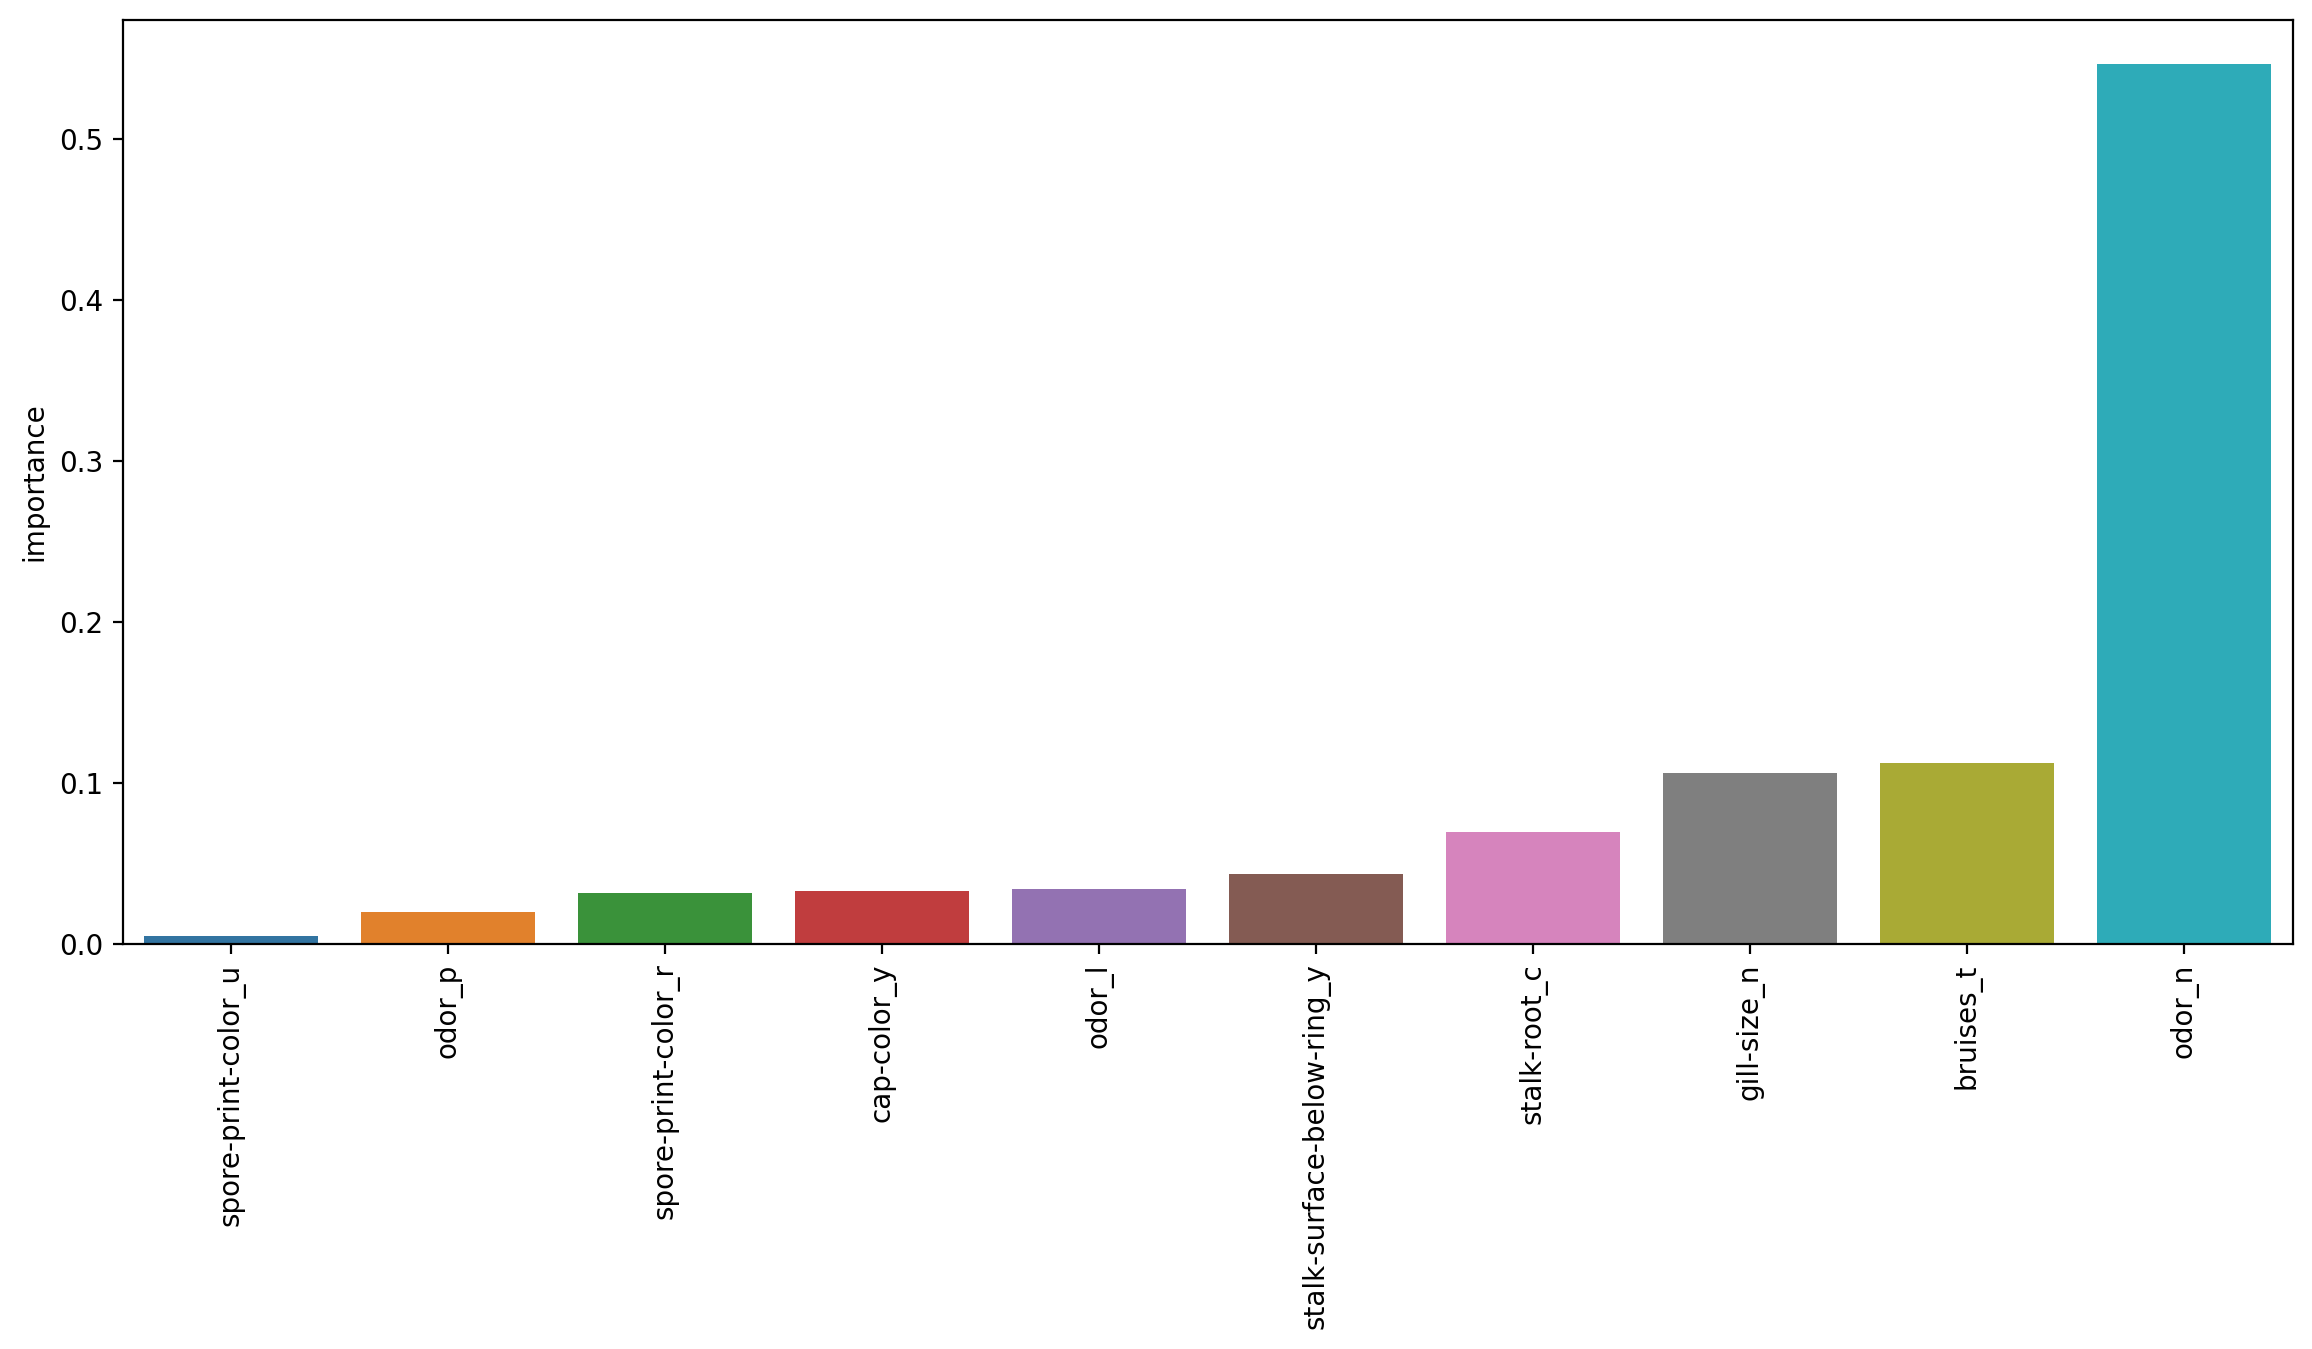

In [24]:
feature_importance = feature_importance.sort_values("importance")
plt.figure(figsize=(14, 6), dpi=200)
sns.barplot(data=feature_importance, x=feature_importance.index, y="importance")
plt.xticks(rotation=90)